In [1]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np

poke_df = pd.read_csv("Pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
poke_stats = ['HP', "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]


In [3]:
poke_df = poke_df.drop(columns = ['#','Name', 'Type 1', 'Type 2', 'Generation', "Legendary"])
poke_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


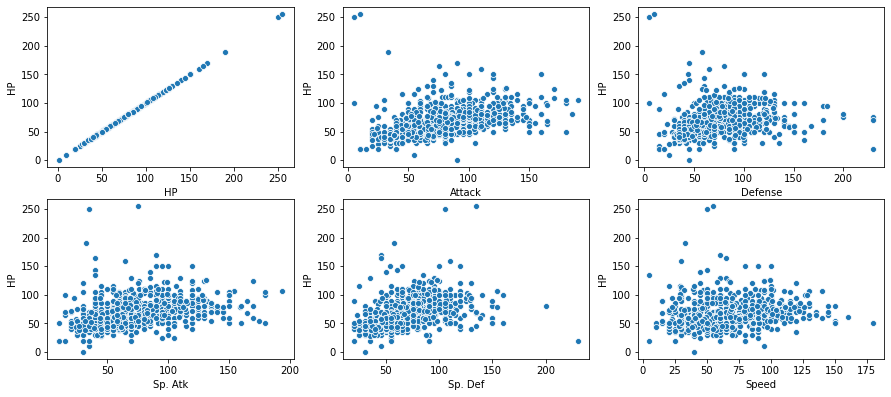

In [4]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')

In [17]:
#preprocessing independent variables
x = poke_df.iloc[:,2:7] 
print(x)
atk = poke_df.iloc[:,2]
dfs = poke_df.iloc[:,3]
sak = poke_df.iloc[:,4]
sdf = poke_df.iloc[:,5]
spd = poke_df.iloc[:,6]


     Attack  Defense  Sp. Atk  Sp. Def  Speed
0        49       49       65       65     45
1        62       63       80       80     60
2        82       83      100      100     80
3       100      123      122      120     80
4        52       43       60       50     65
..      ...      ...      ...      ...    ...
795     100      150      100      150     50
796     160      110      160      110    110
797     110       60      150      130     70
798     160       60      170      130     80
799     110      120      130       90     70

[800 rows x 5 columns]


In [18]:
#preprocessing dependent variables
y = poke_df.iloc[:,1]
print (y)

0      45
1      60
2      80
3      80
4      39
       ..
795    50
796    50
797    80
798    80
799    80
Name: HP, Length: 800, dtype: int64


In [19]:
linreg = LinearRegression()

linreg.fit(x,y)

LinearRegression()

In [20]:
lm = linear_model.LinearRegression()
model = lm.fit(x,y) #fits a linear model

In [21]:
#make predictions
predictions = lm.predict(x)
print(predictions)

[ 61.97277975  68.8483852   78.69335707  88.37376507  56.96147324
  64.00754852  74.8433859   88.00258281  94.2012907   58.60609236
  66.25422792  77.42123311  89.81168072  40.67082738  39.31856243
  65.06481679  42.09921813  40.74695318  73.80050379  81.65700736
  49.27154969  56.65527859  65.55692179  73.05075109  50.33758615
  65.28786763  51.7332125   66.08083933  59.04489757  71.35111241
  54.64222294  74.19368812  52.91026559  65.21648043  52.14355216
  59.52728106  74.97676779  55.26259892  62.47839543  76.38477719
  61.26541448  74.672591    56.82201707  73.61033316  52.80375182
  66.76140918  50.55726601  67.78596678  64.28098209  70.26386116
  79.22021607  64.72659115  77.81850163  58.26861163  66.93736062
  52.45657568  63.66182883  48.35657737  60.6627922   58.03545178
  72.80290958  61.37635593  73.68257077  63.69497366  80.53138437
  49.4169705   55.50351629  76.53072238  53.75713165  61.14086055
  71.16865609  71.06319294  60.7744467   72.33429971  87.69426289
  62.61338

In [22]:
lm.score(x,y) #returns R2 score, percentage of explained variance
lm.coef_ #returns m
lm.intercept_ #returns intercept

31.483221882131858

In [23]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #20% testing

In [24]:
import statsmodels.api as sm

In [25]:
x_train = sm.add_constant(x_train) #add constant term
#y_train.values.reshape(-1,1)
#y_train = list(y_train)

In [26]:
#regression and fit
result = sm.OLS(y_train, x_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     46.18
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           1.05e-40
Time:                        18:16:01   Log-Likelihood:                -2877.7
No. Observations:                 640   AIC:                             5767.
Df Residuals:                     634   BIC:                             5794.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9151      3.162      9.777      0.0

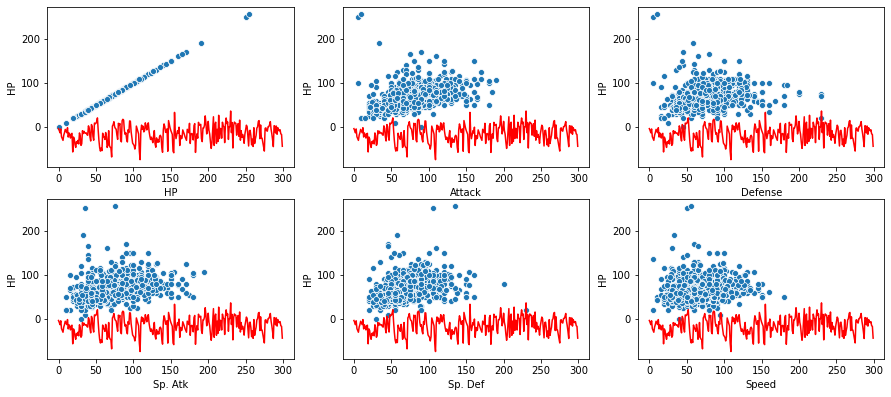

In [30]:
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(poke_stats):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=poke_df, x=i[1], y = 'HP')
    px = np.arange(0,300,1)
    bias = 1
    py = (0.26 * atk[px]) + (-0.0729 * dfs[px]) + (0.1059 * sak[px]) + (0.2291*sdf[px]) + (-0.777*spd[px]) + bias
    plt.plot(py, 'r')
    plt.show
#atk = poke_df.iloc[:,2]
#dfs = poke_df.iloc[:,3]
#sak = poke_df.iloc[:,4]
#sdf = poke_df.iloc[:,5]
#spd = poke_df.iloc[:,6]





NameError: name 'Train' is not defined